# TUGAS ASSIGNMENT PYTHON 1
### NAMA : JONATHAN ADIWINATA
### KODE PESERTA : PYTN-KS12-013
### UNIVERSITAS LAMBUNG MANGKURAT

## HIPOTESIS

Kejahatan apa yang paling banyak terjadi dari tahun 2008 hingga 2016?

In [41]:
#Install dan Import Libraries yang akan digunakan
import numpy as np # untuk mengolah data numerik
import pandas as pd # untuk menampilkan data frame
import matplotlib as mpl # untuk memvisualisasi data
import seaborn as sb # untuk visualisasi data sama seperti matplotlib
import seaborn as sns
import matplotlib.pyplot as plt # untuk memvisualisasi data
import folium # untuk menampilkan visualisasi data dengan map
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [42]:
# Mengimport Data 
# Data ini merupakan data kasus kejahatan yang terjadi dibeberapa wilayah London antara tahun 2008 hingga 2016
london_crime = pd.read_csv(
    "C:/Kuliah/Studi Independen/london_crime.csv") #menggunakan read_csv berdasarkan file berformat csv.

In [43]:
# Menampilakan data bagian paling atas
london_crime.head() #menampilkan 5 baris pertama pada data frame

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [44]:
# Menampilakan data bagian paling bawah
london_crime.tail #menampilkan 5 baris terakhir pada data frame

<bound method NDFrame.tail of           lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                    

In [5]:
#Deskripsi Variabel dan tipe data
london_crime.info() #untuk menampilkan informasi mengenai data frame sehingga dapat melihat nama kolom dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
# Menampilkan kolom data
london_crime.columns 

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [7]:
# Menampilkan dimensi data
london_crime.shape

(13490604, 7)

In [8]:
# Menghilangkan data yang tidak digunakan
# melakukan penghapusan pada kolom data frame karena hanya berupa kode kasus kejahatan
# axis=1 maksudnya menandakan operasi pada kolom
# inplace=True berfungsi untuk menyimpan perubahan pada data frame agar bisa digunakan
london_crime.drop(['lsoa_code'],axis=1, inplace=True)

In [9]:
#menampilkan data frame yang baru setelah dilakukan drop kolom
london_crime

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


In [10]:
#Menghilangkan data pada kolom value yang bernilai 0
df=london_crime[london_crime.value!=0]
df

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...
13490581,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [11]:
#Melalukan reset pada index pada data frame yang baru
df2=df.reset_index(drop=True)
df2

,borough,major_category,minor_category,value,year,month
0,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,Hackney,Violence Against the Person,Harassment,1,2013,2
4,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...
3419094,Bromley,Violence Against the Person,Harassment,3,2009,12
3419095,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
3419096,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
3419097,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [12]:
# Mengubah Nama Kolom
df2.columns =['Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df2

,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,Hackney,Violence Against the Person,Harassment,1,2013,2
4,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...
3419094,Bromley,Violence Against the Person,Harassment,3,2009,12
3419095,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
3419096,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
3419097,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [13]:
#Statistika deskriptif pada data frame
df2.describe()

,No_of_Crimes,Year,Month
count,3.419099e+06,3.419099e+06,3.419099e+06
mean,1.885806e+00,2.011991e+03,6.511021e+00
std,3.118902e+00,2.602550e+00,3.422459e+00
min,1.000000e+00,2.008000e+03,1.000000e+00
25%,1.000000e+00,2.010000e+03,4.000000e+00
50%,1.000000e+00,2.012000e+03,7.000000e+00
75%,2.000000e+00,2.014000e+03,9.000000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [14]:
# Mengurutkan dataframe berdasarkan Kolom Year (tahun)
df2.sort_values(by='Year', ascending=True, axis=0, inplace=True)# mengurutkan data pada baris berdasarkan tahunnya
df2

,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
2248642,Enfield,Sexual Offences,Other Sexual,1,2008,1
3217596,Richmond upon Thames,Burglary,Burglary in a Dwelling,1,2008,10
1658751,Camden,Theft and Handling,Theft From Motor Vehicle,1,2008,3
1658752,Wandsworth,Theft and Handling,Other Theft,1,2008,7
1658754,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle,1,2008,3
...,...,...,...,...,...,...
2202166,Southwark,Theft and Handling,Other Theft,1,2016,7
1197100,Ealing,Theft and Handling,Motor Vehicle Interference & Tampering,1,2016,6
3113201,Greenwich,Burglary,Burglary in Other Buildings,1,2016,4
1196959,Croydon,Violence Against the Person,Harassment,6,2016,5


In [15]:
# Value_count() berfungsi untuk menghitung data yang sering muncul suatu nilai pada Dataframe
df2['Borough'].value_counts()  

Lambeth                   152784
Croydon                   147203
Southwark                 144362
Ealing                    140006
Newham                    137275
Brent                     129925
Lewisham                  128232
Barnet                    127194
Tower Hamlets             120099
Wandsworth                118995
Enfield                   117953
Hackney                   116521
Haringey                  116315
Waltham Forest            114603
Camden                    112029
Islington                 111755
Hillingdon                110614
Westminster               110070
Bromley                   109855
Hounslow                  106561
Redbridge                 105932
Greenwich                 104654
Hammersmith and Fulham     92084
Barking and Dagenham       86849
Havering                   82288
Kensington and Chelsea     81295
Harrow                     73993
Bexley                     73948
Merton                     73661
Sutton                     62776
Richmond u

In [16]:
df2['Major_Category'].value_counts()

Theft and Handling             1136994
Violence Against the Person     894859
Criminal Damage                 466268
Burglary                        441209
Drugs                           231894
Robbery                         163549
Other Notifiable Offences        80569
Fraud or Forgery                  2682
Sexual Offences                   1075
Name: Major_Category, dtype: int64

In [17]:
df2['Minor_Category'].value_counts()

Other Theft                               297281
Theft From Motor Vehicle                  291839
Burglary in a Dwelling                    278792
Assault with Injury                       244990
Harassment                                243827
Common Assault                            231398
Possession Of Drugs                       201464
Criminal Damage To Motor Vehicle          179380
Theft/Taking Of Motor Vehicle             163069
Burglary in Other Buildings               162417
Personal Property                         144078
Other Theft Person                        121674
Criminal Damage To Dwelling               121592
Other Criminal Damage                     112449
Theft/Taking of Pedal Cycle               104947
Theft From Shops                           94947
Wounding/GBH                               90482
Other Notifiable                           75483
Criminal Damage To Other Building          52847
Other violence                             50620
Motor Vehicle Interf

In [18]:
df2['No_of_Crimes'].value_counts()

1      2141789
2       712478
3       275501
4       119483
5        58821
        ...   
216          1
286          1
217          1
244          1
128          1
Name: No_of_Crimes, Length: 246, dtype: int64

In [19]:
df2['Year'].value_counts

<bound method IndexOpsMixin.value_counts of 2248642    2008
3217596    2008
1658751    2008
1658752    2008
1658754    2008
           ... 
2202166    2016
1197100    2016
3113201    2016
1196959    2016
0          2016
Name: Year, Length: 3419099, dtype: int64>

In [20]:
df2['Month'].value_counts()

7     296151
5     293112
10    293086
6     292346
3     288797
11    286886
8     284054
9     282619
4     280792
1     279966
12    271442
2     269848
Name: Month, dtype: int64

In [21]:
# Melakukan pengecekan pada data apakah terdapat nilai null value (kosong) pada data
df2.isnull().sum()

Borough           0
Major_Category    0
Minor_Category    0
No_of_Crimes      0
Year              0
Month             0
dtype: int64

<AxesSubplot:xlabel='No_of_Crimes'>

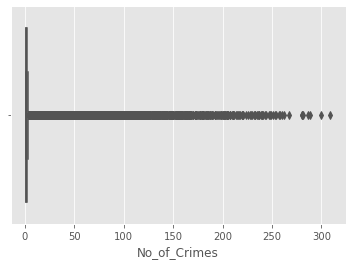

In [22]:
sns.boxplot(x=df2['No_of_Crimes'])

<AxesSubplot:xlabel='Year'>

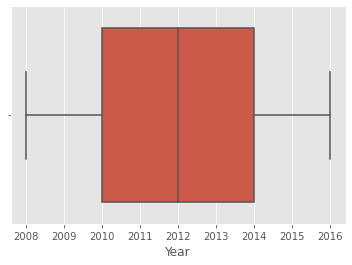

In [23]:
sns.boxplot(x=df2['Year'])

<AxesSubplot:xlabel='Month'>

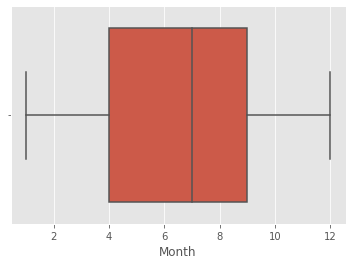

In [24]:
sns.boxplot(x=df2['Month'])

# VISUALISASI DATA

## Bar Chart

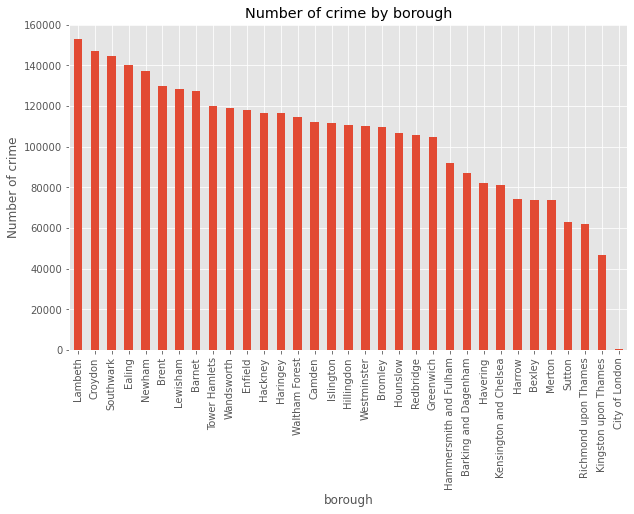

In [25]:
#Visualisasi data berdasarkan wilayah dengan tingkat kejahatan terbanyak
df2.Borough.value_counts().nlargest(33).plot(kind='bar', figsize=(10,6))#menampilkan plot dari dataframe dari nilai data terbesar 
plt.title("Number of crime by borough")# judul plot
plt.ylabel('Number of crime') # label bagian bawah plot
plt.xlabel('borough');# label bagian kiri plot


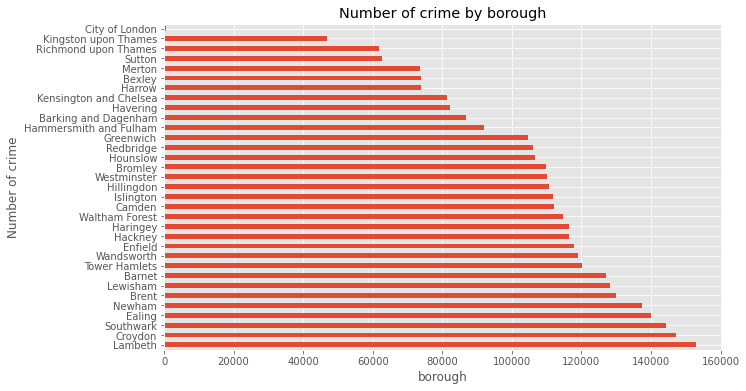

In [26]:
df2.Borough.value_counts().nlargest(33).plot(kind='barh', figsize=(10,6)) #kind berfungsi untuk menentukan jenis plot yang akan dibuat
plt.title("Number of crime by borough") #figsize menentukan ukuran dimensi yang akan dibuat
plt.ylabel('Number of crime')
plt.xlabel('borough');

Berdasarkan plot diatas, dapat dilihat bahwa jika berdasarkan Wilayahnya, tingkat kejahatan terbanyak terjadi pada wilayah Lambeth dengan lebih dari 140.000 ribu kasus, diikuti oleh wilayah Croydon , Southwark dan Ealing yang juga memiliki lebih dari 140.000 kasus kejahatan. Sedangkan untuk tingkat kejahatan terendah terjadi pada wilayah City of London dengan kasus sebanyak 565 kasus kejahatan

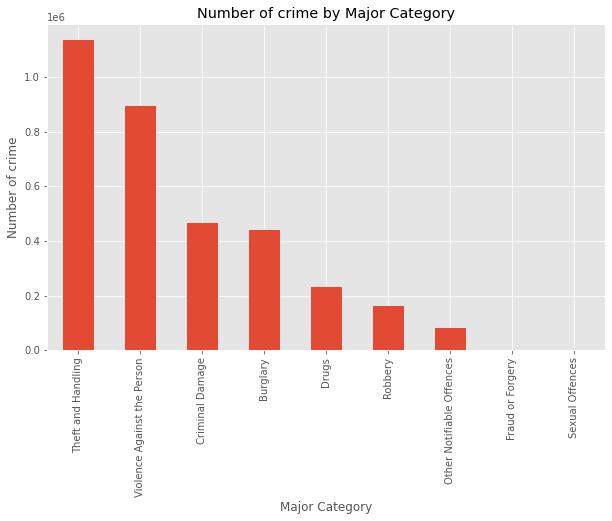

In [27]:
df2.Major_Category.value_counts().nlargest(9).plot(kind='bar', figsize=(10,6))
plt.title("Number of crime by Major Category")
plt.ylabel('Number of crime')
plt.xlabel('Major Category');

Berdasarkan plot diatas, diagram tersebut menunjukkan bahwa jika berdasarkan Kategori Utama Kejahatannya,kategori kejahatan terbanyak yang terjadi di London adalah pencurian, kemudian yeng kedua adalah kekerasan terhadapa seseorang. Sedangkan untuk kategori kejahatan utama yang kasusnya paling sedikit adalah kasus pelecehan seksual dan penipuan.

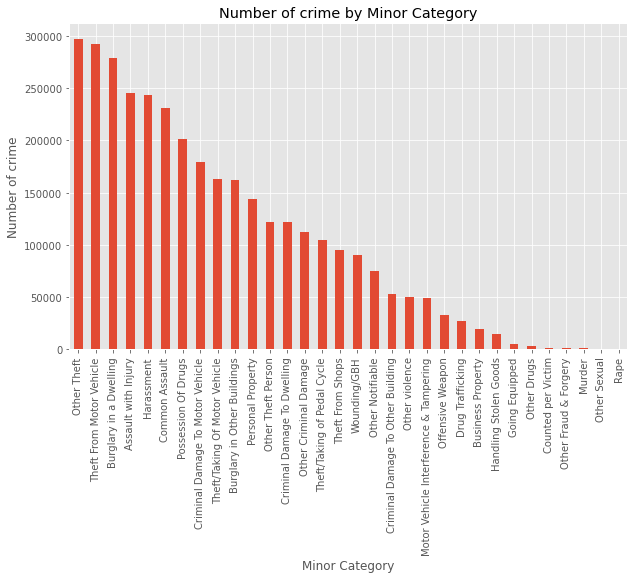

In [28]:
df2.Minor_Category.value_counts().nlargest(32).plot(kind='bar', figsize=(10,6))
plt.title("Number of crime by Minor Category")
plt.ylabel('Number of crime')
plt.xlabel('Minor Category');

Diagram diatas menunjukkan jika berdasarkan Kategori kecil kejahatan di London, 3 kasus kejahatan terbanyak yang terjadi di London adalah pencurian lainnya,pencurian motor dan perampokan dirumah dengan jumlah kasus lebih dari 250.000 kasus. Sedangkan untuk kategori kejahatan kecil yang kasusnya paling sedikit adalah pembunuhan, pelecehan sexual dan pemerkosaan dengan jumlah kasus kurang dari 1000.

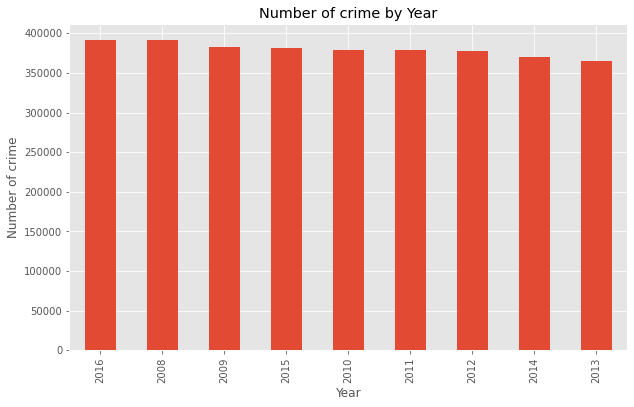

In [29]:
df2.Year.value_counts().nlargest(9).plot(kind='bar', figsize=(10,6))
plt.title("Number of crime by Year")
plt.ylabel('Number of crime')
plt.xlabel('Year');

Jika diurutkan berdasarkan tahun, kasus kejahatan terbanyak yang terjadi di London terjadi pada tahun 2016 kemudian tahun terbanyak kedua adalah tahun 2008. Dan yang paling rendah ada pada tahun 2013. Namun tetap dapat disimpulkan bahwa, dari plot tersebut dapat dipastikan kasus kejahatan diLondon setiap tahun jumlahnya lebih dari 350.000 kasus setiap tahunnya.

## Histogram

In [30]:
#Menseleksi dataframe hanya pada tahun 2015 
tahun2015=df2.loc[df2['Year'] == 2015]
tahun2015

,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
2974552,Hillingdon,Violence Against the Person,Common Assault,2,2015,4
3150772,Kingston upon Thames,Violence Against the Person,Harassment,1,2015,8
3264912,Lewisham,Burglary,Burglary in a Dwelling,1,2015,6
3259969,Islington,Violence Against the Person,Harassment,2,2015,10
3411701,Tower Hamlets,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2015,12
...,...,...,...,...,...,...
2681521,Tower Hamlets,Drugs,Possession Of Drugs,9,2015,3
2719693,Croydon,Violence Against the Person,Wounding/GBH,2,2015,1
2008383,Kensington and Chelsea,Drugs,Drug Trafficking,1,2015,10
1895801,Brent,Violence Against the Person,Harassment,2,2015,5


In [75]:
# menampilkan jumlah nilai unik pada kolom
tahun2015["Borough"].nunique()

33

In [76]:
#Mengelompokkan data berdasarkan wilayah dan menjumlahkannya
df4 = tahun2015.groupby("Borough", axis=0).sum()
df4

,No_of_Crimes,Year,Month
Borough,,,
Barking and Dagenham,16346,19138470,62363
Barnet,24036,29394820,95996
Bexley,11990,15735135,51273
Brent,24883,29130855,95681
Bromley,20637,24506430,79726
Camden,29477,25578410,83192
City of London,151,233740,718
Croydon,28089,31889390,102407
Ealing,26247,29809910,97084


Text(0.5, 0, 'Number of Crime')

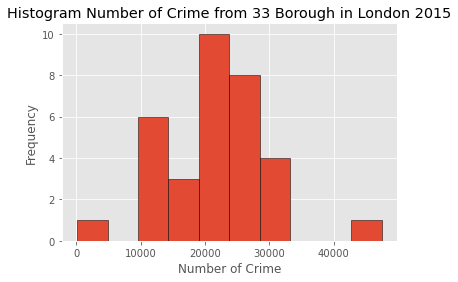

In [78]:
# Menampilkan plot histogram
ax = df4['No_of_Crimes'].plot(kind='hist', bins=10, edgecolor='black')# bins untuk menampilkan rentang nilai untuk membagi data dan dibatasi edge 

ax.set_title("Histogram Number of Crime from 33 Borough in London 2015")
ax.set_xlabel("Number of Crime")

Histogram diatas menunjukkan jumlah kejahatan berdasarkan 33 wilayah di London pada tahun 2015

## Line Chart 

In [34]:
# Menghilangkan tahun 2008, karena banyak terdapat yang kasusnya tidak ada pada tahun selanjutnya
df6=df2[df2.Year!=2008]
df6

,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
661512,Lambeth,Burglary,Burglary in Other Buildings,1,2009,6
563546,Bromley,Violence Against the Person,Common Assault,2,2009,1
1605463,Camden,Criminal Damage,Criminal Damage To Other Building,1,2009,3
1596697,Waltham Forest,Violence Against the Person,Harassment,2,2009,1
3008137,Islington,Burglary,Burglary in Other Buildings,2,2009,4
...,...,...,...,...,...,...
2202166,Southwark,Theft and Handling,Other Theft,1,2016,7
1197100,Ealing,Theft and Handling,Motor Vehicle Interference & Tampering,1,2016,6
3113201,Greenwich,Burglary,Burglary in Other Buildings,1,2016,4
1196959,Croydon,Violence Against the Person,Harassment,6,2016,5


In [35]:
# Membuat table data frame baru berdasarkan kasus kejahatannya dengan index tahun dan kolom kategory utama
London_crime = pd.pivot_table(df6,values=['No_of_Crimes'],
                             index=['Year'],
                             columns=['Major_Category'],
                             aggfunc=np.sum,fill_value=0)
London_crime

No_of_Crimes                                                   \
Major_Category     Burglary Criminal Damage  Drugs Other Notifiable Offences   
Year                                                                           
2009                  90619           85565  60549                     10644   
2010                  86826           77897  58674                     10768   
2011                  93315           70914  57550                     10264   
2012                  93392           62158  51776                     10675   
2013                  87222           56206  50278                     10811   
2014                  76053           59279  44435                     13037   
2015                  70489           62976  39785                     14229   
2016                  68285           64071  38914                     15809   

                                                                       
Major_Category Robbery Theft and Handling Violence Against the Person  
Year                                                                   
2009             29568             279492                      160777  
2010             32341             290924                      157894  
2011             36679             309292                      146901  
2012             35260             334054                      150014  
2013             29337             306372                      146181  
2014             22150             279880                      185349  
2015             21383             284022                      218740  
2016             22528             294133                      232381

In [36]:
#Mengganti nama kolom
London_crime.columns = ['Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person']
London_crime.head()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person
Year,,,,,,,
2009,90619,85565,60549,10644,29568,279492,160777
2010,86826,77897,58674,10768,32341,290924,157894
2011,93315,70914,57550,10264,36679,309292,146901
2012,93392,62158,51776,10675,35260,334054,150014
2013,87222,56206,50278,10811,29337,306372,146181


In [37]:
London_crime.index

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')

In [38]:
London_crime.columns

Index(['Burglary', 'Criminal Damage', 'Drugs', 'Other Notifiable Offences',
       'Robbery', 'Theft and Handling', 'Violence Against the Person'],
      dtype='object')

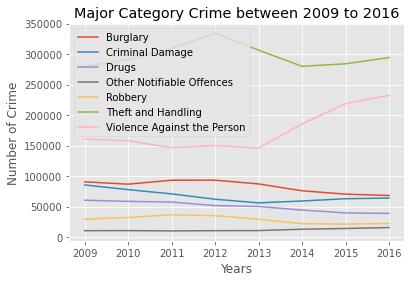

In [39]:
#Menampilkan plot line chart
London_crime.plot(kind='line')
plt.title('Major Category Crime between 2009 to 2016')
plt.xlabel('Years')
plt.ylabel('Number of Crime')    
plt.legend(labels=London_crime.columns, loc='upper left')

1. Diagram garis diatas menunjukan pergerakan jumlah kasus kejahatan dari beberapa kategori antara tahun 2009 hingga tahun 2016. 
2. Dari diagram tersebut dapat dilihat kategori terbanyak kasus kejahatan di London adalah pencurian, dan yang kategori terendah adalah pelanggaran kasus penting lainnya.
3. Dari diagram tersebut, jumlah kategori kasus yang pergerakanya meningkat drastis adalah kekerasan terhadap seseorang, yang awalnya pada tahun 2009 jumlah kasusnya sekitar 160.000 meningkat menjadi 230.000 pada tahun 2016.

Text(0, 0.5, 'Number of Crime')

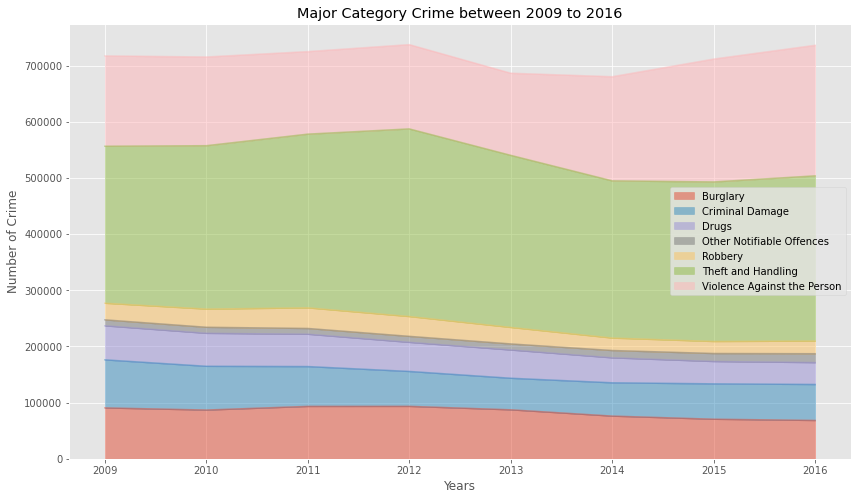

In [40]:
# Menampilkan plot area
London_crime.plot(kind='area', 
           alpha=0.5,
           stacked=True,
           figsize=(14,8))
plt.title('Major Category Crime between 2009 to 2016')
plt.xlabel('Years')
plt.ylabel('Number of Crime')

Dari diagram area diatas, kita dapat mengurutkan kategori mana dengan jumlah kasus terendah hingga jumlah kasus terbanyak. Jika diurutkan dari yang terendah maka urutannya adalah 
1.Other Notifiable Offences
2.Robbery
3.Drugs
4.Criminal Damage
5.Burglary
6.Violence Against the Person
7.Theft and Handling

In [51]:
# Mengelompokkan data berdasarkan tahun
pertahun=df2.groupby('Year').sum()
pertahun

,No_of_Crimes,Month
Year,,
2008,738641,2518964
2009,717214,2478373
2010,715324,2457347
2011,724915,2476825
2012,737329,2445556
2013,686407,2378520
2014,680183,2435433
2015,711624,2505648
2016,736121,2565161


Text(0, 0.5, 'Number of Crime')

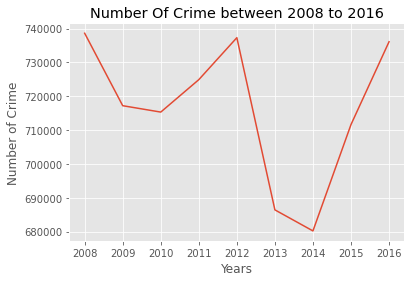

In [55]:
# Menampilkan plot line chart
pertahun['No_of_Crimes'].plot(kind='line')
plt.title('Number Of Crime between 2008 to 2016')
plt.xlabel('Years')
plt.ylabel('Number of Crime')    

Diagram garis diatas menunjukkan pergerakan kasus kejahatan di London dari tahun 2008 hingga tahun 2016

## Area Plot

In [47]:
# Membuat table data frame dengan berdasarkan kolom No_of_Crimes dengan index tahun dan kolom wilayahnya
London_crime2 = pd.pivot_table(df2,values=['No_of_Crimes'],
                             index=['Year'],
                             columns=['Borough'],
                             aggfunc=np.sum,fill_value=0)
London_crime2

No_of_Crimes                                      \
Borough Barking and Dagenham Barnet Bexley  Brent Bromley Camden   
Year                                                               
2008                   17656  23944  15305  23504   24015  32010   
2009                   17713  23449  14445  24748   21858  31612   
2010                   17130  23416  13166  25512   19572  31804   
2011                   16686  24007  11325  27669   19868  33956   
2012                   15990  23573  11669  26357   19622  31472   
2013                   15759  22510  11552  23759   18945  28435   
2014                   15426  22572  11844  24426   19668  27198   
2015                   16346  24036  11990  24883   20637  29477   
2016                   16741  24684  12840  26693   20164  29183   

                                               ...                          \
Borough City of London Croydon Ealing Enfield  ... Merton Newham Redbridge   
Year                                           ...                           
2008                 0   29516  28947   21980  ...  13875  29752     20873   
2009                 0   29784  28617   21147  ...  13561  28610     20837   
2010                 0   29373  31360   20808  ...  13595  30728     20652   
2011                69   29830  29537   21041  ...  13548  27978     21994   
2012               157   30189  28832   21069  ...  12856  30067     21424   
2013               110   27444  25917   21574  ...  11595  27577     19793   
2014               115   27357  24978   21700  ...  11596  28005     19590   
2015               151   28089  26247   22076  ...  12273  29217     18897   
2016               178   28712  27127   22485  ...  12755  30090     19502   

                                                                            \
Borough Richmond upon Thames Southwark Sutton Tower Hamlets Waltham Forest   
Year                                                                         
2008                   11106     33470  12943         23578          24080   
2009                   10618     30623  12240         21959          24761   
2010                   10601     31320  12032         23072          24818   
2011                   10896     30723  11068         24712          23714   
2012                   11168     30737  10948         26784          22647   
2013                   10439     31128  10057         26258          21903   
2014                   10456     28912  10443         25504          20271   
2015                   10413     30260  10598         27493          20969   
2016                   11074     31636  10658         29253          20716   

                                
Borough Wandsworth Westminster  
Year                            
2008         23330       47846  
2009         23021       48456  
2010         22815       48116  
2011         21384       54243  
2012         24457       59226  
2013         22290       53852  
2014         21364       47564  
2015         22401       47395  
2016         23679       48330  

[9 rows x 33 columns]

In [48]:
#Mengubah nama kolom
London_crime2.columns = ['Barking and Dagenham', 'Barnet','Bexley','Brent',
                        'Bromley','Camden','City of London','Croydon','Ealing','Enfield','Greenwich','Hackney','Hammersmith and Fulham','Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton','Newham','Redbridge', 'Richmond upon Thames','Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth','Westminster']
London_crime2.head()

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226


In [49]:
London_crime2.columns

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object')

In [50]:
London_crime2.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')

In [54]:
#Menampilkan data wilayah Lambeth
Lambeth = London_crime2['Lambeth']
Lambeth

Year
2008    31717
2009    31225
2010    31671
2011    33224
2012    33473
2013    31868
2014    31765
2015    33164
2016    34071
Name: Lambeth, dtype: int64

<AxesSubplot:xlabel='Year'>

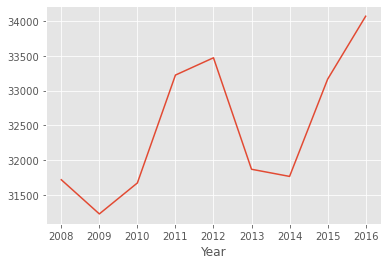

In [53]:
#Menampilkan plot line dari data wilayah Croydon
Lambeth.plot()

Dari grafik diatas dapat disimpulkan bahwa kasus kejahatan terbanyak yang terjadi diwilayah Lambeth yaitu terjadi pada tahun 2016 dan kasus kejahatan terendahnya terjadi pada tahun 2009.

In [76]:
# Akan melakukan perbandingan data dari beberapa wilayah berdasarkan tahun
#Mengubah index menjadi kolom
compare_data = London_crime2.transpose()
compare_data

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
City of London,0,0,0,69,157,110,115,151,178
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127
Enfield,21980,21147,20808,21041,21069,21574,21700,22076,22485


In [126]:
# Mengambil data bagian paling bawah untuk dibandingkan
compare_data2=compare_data.tail(3)
compare_data2=compare_data2.transpose()
compare_data2

,Waltham Forest,Wandsworth,Westminster
Year,,,
2008,24080,23330,47846
2009,24761,23021,48456
2010,24818,22815,48116
2011,23714,21384,54243
2012,22647,24457,59226
2013,21903,22290,53852
2014,20271,21364,47564
2015,20969,22401,47395
2016,20716,23679,48330


Text(0, 0.5, 'Number of Crime')

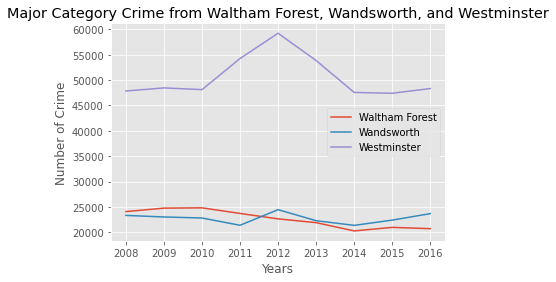

In [79]:
#Menampilkan plot
compare_data2.plot(kind='line')
plt.title('Major Category Crime from Waltham Forest, Wandsworth, and Westminster')
plt.xlabel('Years')
plt.ylabel('Number of Crime')

Dari grafik diatas dapat disimpulkan bahwa kasus kejahatan terbanyak yang terjadi dari 3 wilayah tersebut adalah wilayah Westminster dengan kasus lebih dari 45.000 setiap tahunya, sedangkan Waltham Forest dan Wandsworth hanya sekitar 20.000 setiap tahunnya

Text(0, 0.5, 'Number of Crime')

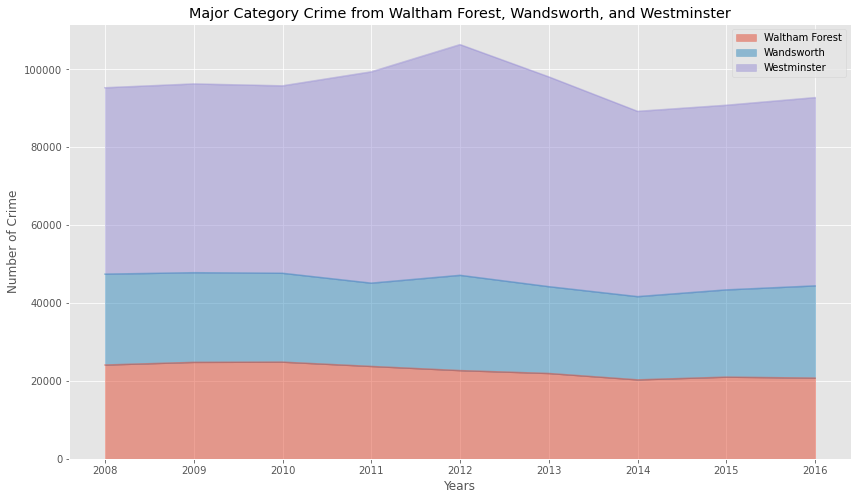

In [74]:
compare_data2.plot(kind='area', 
           alpha=0.5,
           stacked=True,
           figsize=(14,8))
plt.title('Major Category Crime from Waltham Forest, Wandsworth, and Westminster')
plt.xlabel('Years')
plt.ylabel('Number of Crime')

Dari grafik area tersebut dapat disimpulkan bahwa kasus kejahatan terbanyak yang terjadi dari 3 wilayah tersebut adalah wilayah Westminster karena memiliki daerah area yang paling besar dibanding Waltham Forest dan Wandsworth

## BoxPlot

<AxesSubplot:xlabel='Year'>

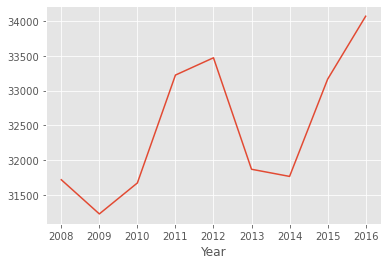

In [55]:
Lambeth.plot()

<AxesSubplot:>

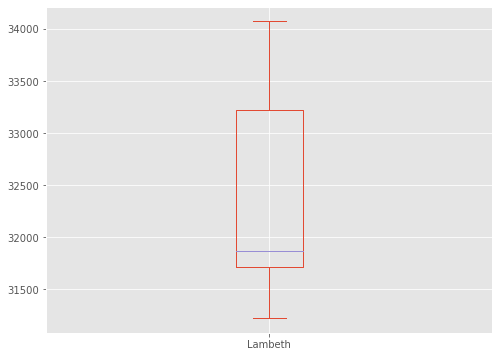

In [56]:
# Menampilkan box plot berdasarkan data wilayah Lambeth
Lambeth.plot(kind='box', figsize=(8,6))

Dari grafik boxplot diatas dapat dilihat bahwa tidak terdapat outlier pada data wilayah Lambeth

In [127]:
compare_data2.transpose()

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Waltham Forest,24080,24761,24818,23714,22647,21903,20271,20969,20716
Wandsworth,23330,23021,22815,21384,24457,22290,21364,22401,23679
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330


In [128]:
compare_data2.drop(['Westminster'],axis=1, inplace=True)

<AxesSubplot:>

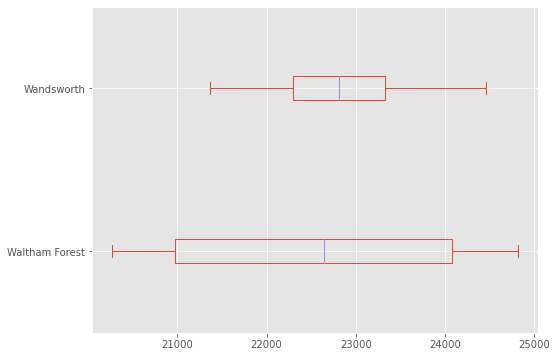

In [129]:
compare_data2.plot(kind='box', figsize=(8,6), vert=False)

Dari diagram boxplot diatas, dapat dilihat tidak terdapat outlier pada data tersebut

## Pie Chart

In [135]:
#Mengelompokkan data berdasarkan major_category atau kategori utama
df3 = df2.groupby("Major_Category", axis=0).sum()
df3

,No_of_Crimes,Year,Month
Major_Category,,,
Burglary,754293,887653908,2866631
Criminal Damage,630938,938004663,3014509
Drugs,470765,466514153,1494378
Fraud or Forgery,5325,5385456,4043
Other Notifiable Offences,106349,162130432,526424
Robbery,258873,329016270,1059824
Sexual Offences,1273,2158600,1607
Theft and Handling,2661861,2287640348,7424506
Violence Against the Person,1558081,1800691047,5869905


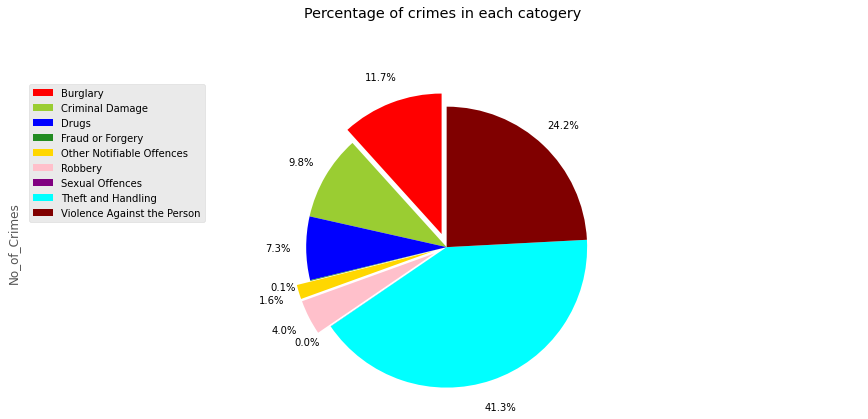

In [137]:
#Menampilkan plot
color_list = ["red", "yellowgreen", "blue", "forestgreen", "gold", "pink", "purple", "cyan", "maroon"]# warna 


df3['No_of_Crimes'].plot(
    kind='pie'
    ,figsize=(15,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,labels=None
    ,colors=color_list
    ,pctdistance=1.2
    ,explode = [0.1,0,0,0,.1,.1,0,0,0]
) 

plt.title("Percentage of crimes in each catogery\n", y=1.12)
plt.axis('equal')
plt.legend(labels=df3.index, loc='upper left')


Dari diagram pie chart dapat diketahui bahwa 41.3% kasus kejahatan terbanyak di London ada pada kategori Theft and Handling (pencurian) dan 24.2% nya adalah Violence Against the Person (Kekerasan terhadap seseorang). Kemudian ketiganya ada 11.7% Burglary (perampokan).

## Scatter Plot

In [144]:
# Mengambil data hanya pada tahun 2016
tahun2016=df2.loc[df2['Year'] == 2016]
tahun2016

,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
97908,Haringey,Criminal Damage,Other Criminal Damage,2,2016,8
653883,Croydon,Violence Against the Person,Assault with Injury,1,2016,4
650854,Barking and Dagenham,Theft and Handling,Theft From Motor Vehicle,2,2016,11
653924,Croydon,Violence Against the Person,Wounding/GBH,1,2016,8
2694752,Southwark,Criminal Damage,Criminal Damage To Dwelling,1,2016,2
...,...,...,...,...,...,...
2202166,Southwark,Theft and Handling,Other Theft,1,2016,7
1197100,Ealing,Theft and Handling,Motor Vehicle Interference & Tampering,1,2016,6
3113201,Greenwich,Burglary,Burglary in Other Buildings,1,2016,4
1196959,Croydon,Violence Against the Person,Harassment,6,2016,5


In [145]:
# Menampilkan data menjadi array
months=tahun2016['Month'].unique()
months

array([ 8,  4, 11,  2,  7,  3, 10, 12,  6,  1,  5,  9], dtype=int64)

In [140]:
# Mengurutkan array
months.sort()
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [146]:
# Mengelompokkan data berdasarkan kolom bulan
sum_month=tahun2016.groupby(['Month']).sum()
sum_month

,No_of_Crimes,Year
Month,,
1,58847,63945504
2,56697,62387136
3,59167,64677312
4,58637,64028160
5,63990,68658912
6,62262,66437280
7,65519,69172992
8,62666,66709440
9,61412,66308256


In [147]:
# mengubah data menjadi array
Values=sum_month['No_of_Crimes'].to_numpy()
Values

array([58847, 56697, 59167, 58637, 63990, 62262, 65519, 62666, 61412,
       63405, 61064, 62455], dtype=int64)

In [149]:
# Membuat array dari nama-nama bulan
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
name_of_months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [154]:
# Membuat daftar urutan bulan agar bisa digabungkan dengan array nama bulan
n1 = np.arange(len(months))
n1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [155]:
# membuat list baru
xrange=range(0,12)
xrange

range(0, 12)

(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

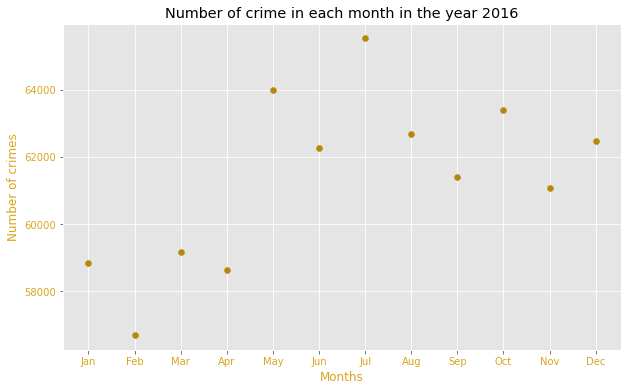

In [156]:
# Menampilkan plot
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set()
plt.scatter(xrange,Values,color='darkgoldenrod',cmap='viridis',alpha=1)
plt.title("Number of crime in each month in the year 2016")
plt.xlabel('Months',color='goldenrod')
plt.ylabel('Number of crimes',color='goldenrod')
plt.xticks(n1,name_of_months)
plt.xticks(color='goldenrod')
plt.yticks(color='goldenrod')

Dari grafik scatter plot tersebut, dapat diterlihat bahwa kasus kejahatan terbanyak pada tahun 2016 terjadi pada bulan Juli dengan kasus lebih dari 64.000 dan yang kedua terbanyak terjadi pada bulan May dengan 64000 kasus. Dapat disimpulkan juga bahwa pada tahun 2016, setiap bulan kecuali bulan Februari, memiliki kasus kejahatan lebih dari 58.000 diLondon.

## WordCloud

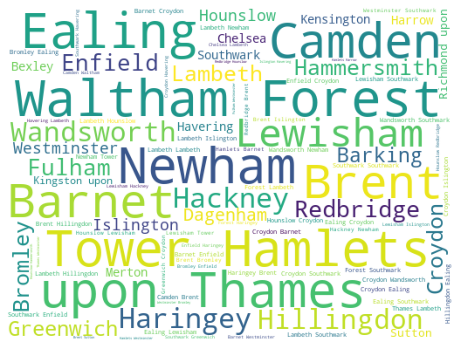

In [168]:
from wordcloud import WordCloud
x2011 = df2.Borough[df2.Year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384
                     ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

kumpulan kata diatas menunjukkan beberapa wilayah(Borough) yang paling sering muncul pada data tahun 2011

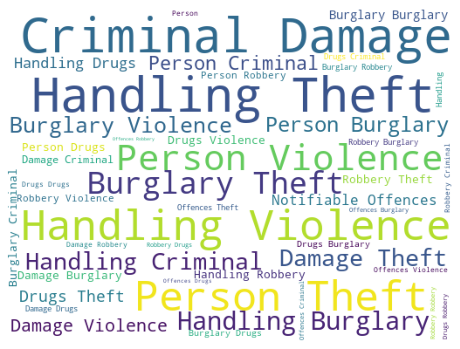

In [169]:
Major_Category2013 = df2.Major_Category[df2.Year == 2013]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384
                     ).generate(" ".join(Major_Category2013))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

kumpulan kata diatas menunjukkan beberapa kategori kejahatan(Major Category)di London yang paling sering muncul pada tahun 2013

## Folium Map

In [157]:
#Referensi Map Longitude dan Latitude : https://www.latlong.net/
#Referensi Youtube :https://www.youtube.com/watch?v=QpBmO35pmVE
# Map Kota London
Londonmap = folium.Map(location=[51.507351, -0.127758], tiles='CartoDB positron', zoom_start=10)
Londonmap

In [158]:
#Map Kota Barking and Dagenham
folium.Marker(location=[51.536282, 0.081480], popup= "<strong>Barking and Dagenham</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [159]:
#Map Kota Barnet
folium.Marker(location=[51.652931, -0.199610], popup= "<strong>Barnet</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [160]:
# Map Kota Bexley
folium.Marker(location=[51.434952, 0.079480], popup= "<strong>Bexley</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [161]:
#Map Kota Brent
folium.Marker(location=[51.575169, -0.234730], popup= "<strong>Brent</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap


In [162]:
#Map Kota Bromley
folium.Marker(location=[51.405682, 0.014350], popup= "<strong>Bromley</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [163]:
#Map Kota Camden
folium.Marker(location=[51.541879, -0.139431], popup= "<strong>Camden</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [164]:
#Map Kota City of London
folium.Marker(location=[51.513389, -0.088981], popup= "<strong>City of London</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [165]:
#Map Kota Croydon
folium.Marker(location=[51.376163, -0.098234], popup= "<strong>Croydon</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [166]:
#Map Kota Ealing
folium.Marker(location=[51.513351, -0.304210], popup= "<strong>Ealing</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [167]:
#Map Kota Enfield
folium.Marker(location=[51.652100, -0.081530], popup= "<strong>Enfield</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [168]:
#Map Kota Greenwich
folium.Marker(location=[51.482578, -0.007659], popup= "<strong>Greenwich</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [169]:
#Map Kota Hackney
folium.Marker(location=[51.545792, -0.055420], popup= "<strong>Hackney</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [170]:
#Map Kota Hammersmith 
folium.Marker(location=[51.492908, -0.225790], popup= "<strong>Hammersmith</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [171]:
#Map Kota Fulham
folium.Marker(location=[51.474339, -0.206801], popup= "<strong>Fulham</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [172]:
#Map Kota Haringey
folium.Marker(location=[51.582367, -0.099668], popup= "<strong>Haringey</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [173]:
#Map Kota Harrow
folium.Marker(location=[51.580077, -0.337633], popup= "<strong>Harrow</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [174]:
#Map Kota Havering
folium.Marker(location=[51.615829, 0.183440], popup= "<strong>Havering</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [175]:
#Map Kota Hillingdon
folium.Marker(location=[51.532722, -0.452654], popup= "<strong>Hillingdon</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [176]:
#Map Kota Hounslow
folium.Marker(location=[51.467109, -0.362446], popup= "<strong>Hounslow</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [177]:
#Map Kota Islington
folium.Marker(location=[51.538093, -0.099540], popup= "<strong>Islington</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [178]:
#Map Kota Chelsea
folium.Marker(location=[51.487470, -0.168680],popup= "<strong>Chelsea</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [179]:
#Map Kota Kensington
folium.Marker(location=[51.499045, -0.198626],popup= "<strong>Kensington</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [180]:
#Map Kota Kingston upon Thames
folium.Marker(location=[51.408854, -0.305123],popup= "<strong>Kingston upon Thames</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [181]:
#Map Kota Lambeth
folium.Marker(location=[51.495315, -0.116239],popup= "<strong>Lambeth</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [182]:
#Map Kota Lewisham
folium.Marker(location=[51.462617, -0.010200],popup= "<strong>Lewisham</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [183]:
#Map Kota Merton
folium.Marker(location=[51.414309, -0.187655],popup= "<strong>Merton</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [184]:
#Map Kota Newham
folium.Marker(location=[51.518614, 0.035272],popup= "<strong>Newham</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [185]:
#Map Kota Redbridge
folium.Marker(location=[50.921182, -1.470642],popup= "<strong>Redbridge</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [187]:
#Map Kota Redbridge
folium.Marker(location=[51.565019, 0.080208],popup= "<strong>Redbridge</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [188]:
#Map Kota Southwark
folium.Marker(location=[51.503897, -0.104929],popup= "<strong>Southwark</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [189]:
#Map Kota Sutton
folium.Marker(location=[51.360450, -0.191780],popup= "<strong>Sutton</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [191]:
#Map Wilayah Tower Hamlets
folium.Marker(location=[51.520261, -0.029340],popup= "<strong>Tower Hamlets</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [192]:
#Map Wilayah Waltham Forest
folium.Marker(location=[51.678303, 0.033783],popup= "<strong>Waltham Forest</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [193]:
#Map Wilayah Wandsworth
folium.Marker(location=[51.456790, -0.192680],popup= "<strong>Wandsworth</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

In [194]:
#Map Wilayah Westminster
folium.Marker(location=[51.500150, -0.126240],popup= "<strong>Westminster</strong>", tooltip=" Click for more Information").add_to(Londonmap)
Londonmap

# KESIMPULAN

Dari hasil visualisasi data diatas, dapat disimpulkan berdasarkan hipotesis diatas kejahatan yang paling banyak terjadi diLondon dari tahun 2008 hingga 2016 adalah 'Theft and Handling' dengan total kasus sebanyak 1.136.994 kasus kejahatan. Hal ini terjadi sejak tahun 2008 hingga 2016 yang terbagi dari 33 wilayah di London